<a href="https://colab.research.google.com/github/AniketParasher/Credit_Card_Approval_Prediction/blob/main/ML_credit_card_approval_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project proposal to predict credit card approval - by Aniket (S5861)**

# **FAQ Section - Project related Questions**

## **Section 1**

## Objective📈

In the dynamic landscape of the current Indian financial market, where a bullish trend prevails and banks, in the pursuit of market share, may sometimes overlook the meticulous assessment of creditworthiness, our client emerges as a pioneer in prioritizing prudence and responsibility. Amidst this trend, our client, a forward-thinking institution, recognizes the imperative to uphold rigorous credit evaluation standards.

The primary goal of this project is to develop an advanced machine learning model designed to predict credit card approval for potential applicants. By harnessing historical data and employing cutting-edge predictive analytics, the model aims to assess the creditworthiness of individuals, providing a reliable decision-making tool for the credit approval process.

Having undertaken the credit card approval project, I applied my proficiency in Python to develop a robust Machine Learning (ML) model that precisely aligns with the unique needs of our client. By leveraging advanced Python programming techniques, I successfully crafted a solution that not only addresses the current challenges in the financial market but also positions our client as a leader in responsible credit evaluation.

### Why is this proposal important in today’s world? How predicting a good client is worthy for a bank?

The predictive model will assist the client in evaluating credit risk associated with each applicant, enabling more informed and data-driven decisions. This result in faster processing times, reducing the overall time and effort.

### How it is going to impact the banking sector?

Increase efficiency in processing and reduce operations cost. Enhance customer experience, bring transperancy in process. It will improve banks image for using fair practices

### If any, what is the gap in knowledge or how your proposed method can be helpful if required in future for any bank in India

The proposed method can improve the bank working efficiency, ease the method of review the credit worthyness of applicant. This can be deployed and applicants can also have access to see thier eligibility, it will bring transperancy in process and trust on bank.

## Section 2 : Initial Hypotheses

In the Data Analysis (DA) track, we will aim to identify patterns in the data and important features that may impact a Machine #Learning (ML) model. Our initial hypotheses are:
1. Annual_income, Employed_days, Birthday_count are important in predicting the approval.
2. propert_owner, car_owner, type_income has impact on approval rate
3. Martial_status, housing_type, family member also play a role and has some correlation with card approval.


## Section 3: Data Analysis Approach

### 1. What approach you are going to take in order to approve and disapprove your hypothesis?

I will be using univariate, bivariate and multivariate analysis to understand the relationship between features and with respect to target column. After that I will be performing the test like ttest, chi-square to test my hypothesis.

### 2. What feature engineering techniques will be relevant to your project?

The feature engineering techinques to be used in this project: Data cleaning, Outlier treatment, categorical encoding, feature selection and feature scaling.

### 3. Please justify your data analysis approach.

**Approach to the Project: Transforming Credit Card Approval with Innovative Machine Learning Solutions**

1. Understanding the Data
2. Exploratory Data Analysis
3. Data Prepration
4. Model Training
5. Model Evaluation

## Section 4: Machine Learning Approach

### Which method you will use for machine learning based predictions for credit card approval

The methods or models used are:
1. Logistic Regression
2. RandomForestClassifier
3. XgboostClassifier
4. SVM

### 2. Please justify the most appropriate model.

The most appropriate model for this project is xgboostclassifier and Randomeforest classifier. Both model performed better. If we consider the current economy trend which is bullish, the XGBClassifier with better recall is best model

### Justification for Model Selection:

1. Logistic Regression - It is is a straightforward algorithm, making it easy to interpret the results. Well-suited for binary classification problems which is our case approved and rejected.
2. Support Vector Machine (SVM) - Effective in high-dimensional spaces: SVM can handle a large number of features, making it suitable for complex datasets.SVM aims to maximize the margin, reducing the risk of overfitting.
3. XGBoost - XGBoost is an ensemble method that combines the strengths of multiple weak learners, often resulting in superior predictive performance.
4. Random Forest - Random Forest is an ensemble of decision trees, providing robustness and reducing the risk of overfitting. It can capture complex relationships in the data due to its ensemble nature.

### Steps to Improve Model Accuracy:

Feature selection to identify the most relevant variables. Hyperparameter tuning for model optimization. Cross-validation to assess model performance. Evaluation metrics, such as accuracy,
precision, recall, and F1-score, to justify the chosen model.

### Comparison of Models:

At the we compared the performance of at least four machine learning models using relevant metrics and visualization tools to determine the most suitable model for credit card approval prediction.

# **📌Importing the required libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# imports the warnings module to ignore warning messages
import warnings, gc, joblib
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, PrecisionRecallDisplay, precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, f_classif, RFE, SequentialFeatureSelector
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN
from collections import Counter

1. Understanding the Data
2. Exploratory Data Analysis
3. Data Prepration
4. Model Training
5. Model Evaluation



#**📌1. Understanding the Data📊**

In [ ]:
# 1st csv importing
df1 = pd.read_csv('/content/Credit_card.csv')
# 2nd csv importing
df2 = pd.read_csv('/content/Credit_card_label.csv')

Merging the two columns based on common column - **Ind_ID**

In [ ]:
# merging the two dataframe
df = pd.merge(df1, df2, on='Ind_ID', how='inner')

In [ ]:
# to display two rows
df.head(2)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
# to display shape of dataframe
df.shape

(1548, 19)

The Dataframe has 19 features and 1548 rows.

In [ ]:
# to get overview of dataframe columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
# to generates various statistics summary
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [ ]:
# to find out null values in all columns
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

🔼 we can see **GENDER, Annual_income, Birthday_count, Type_Occupation** has null values. Let us see how much percentage of null values they have

In [ ]:
# to display percentage of null values in columns
df.isnull().mean()*100

Ind_ID              0.000000
GENDER              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
label               0.000000
dtype: float64

The gender, Annual_income, Birthday_count has very less number null values, it won't affect dataset if we remove these records. Type Occupation has 31% null values, so i consider droping it as well.

In [ ]:
# to find duplicate values in dataframe
df.duplicated().sum()

0

In [ ]:
df.nunique() == 1

Ind_ID             False
GENDER             False
Car_Owner          False
Propert_Owner      False
CHILDREN           False
Annual_income      False
Type_Income        False
EDUCATION          False
Marital_status     False
Housing_type       False
Birthday_count     False
Employed_days      False
Mobile_phone        True
Work_Phone         False
Phone              False
EMAIL_ID           False
Type_Occupation    False
Family_Members     False
label              False
dtype: bool

Dropping the column which is filled with only one value in that column i.e 'Mobile Phone'

In [ ]:
df.drop(labels=df.columns[df.nunique() == 1],axis=1,inplace=True)

Understanding the records in each column using below code

In [ ]:
for col in df.columns:
  print(f"{col}: {df[col].unique()}")

Ind_ID: [5008827 5009744 5009746 ... 5115992 5118219 5053790]
GENDER: ['M' 'F' nan]
Car_Owner: ['Y' 'N']
Propert_Owner: ['Y' 'N']
CHILDREN: [ 0  1  2  4  3 14]
Annual_income: [ 180000.   315000.        nan  450000.    90000.   472500.   270000.
  126000.   202500.   157500.   112500.   540000.   292500.   135000.
   76500.   215100.   225000.    67500.   171000.   103500.    99000.
  391500.    65250.    72900.   360000.   256500.   675000.   247500.
   85500.   121500.   130500.   211500.    81000.    72000.   148500.
  162000.   195750.   585000.   216000.   306000.   108000.    63000.
   45000.   337500.   131400.   117000.   445500.   234000.  1575000.
  144000.    67050.    73350.   193500.   900000.    94500.   198000.
   54000.   166500.   167400.   153000.   423000.   243000.   283500.
  252000.   495000.   612000.    36000.   139500.   133650.   427500.
  261000.   231750.    90900.    45900.   119250.    58500.   328500.
  787500.   594000.   119700.    69372.    37800.   387

# **📌2. Exploratory Data Analysis📊**

### Understanding the label column

<Axes: xlabel='label', ylabel='count'>

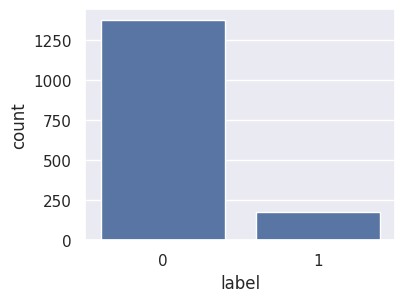

In [ ]:
plt.figure(figsize=(4, 3))
sns.set_theme()
sns.countplot(df, x='label')

🔼 we can see above there is huge **class imbalance in label column** which will be addressed in coming steps

In [ ]:
df.dropna(axis=0, subset=['GENDER', 'Annual_income', 'Birthday_count'], inplace=True)

In [ ]:
df.drop(labels=['Type_Occupation'], axis=1, inplace=True)

In [ ]:
df.head(3)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,2,1


In [ ]:
df.isnull().sum()

Ind_ID            0
GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Birthday_count    0
Employed_days     0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
label             0
dtype: int64

# 2.1 Univariate Analysis

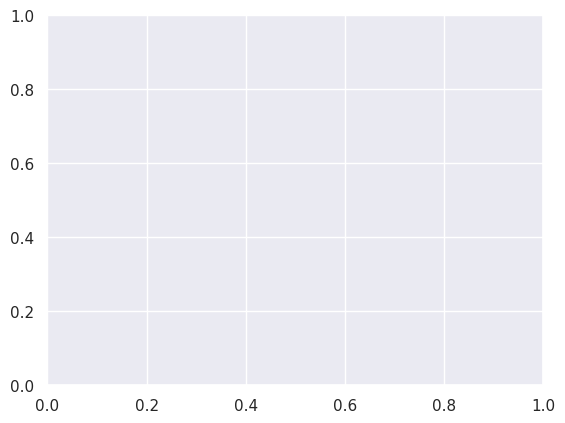

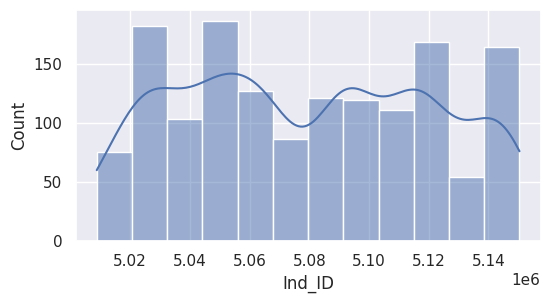

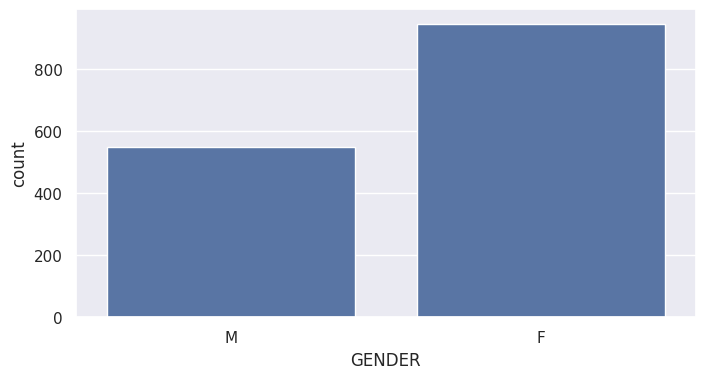

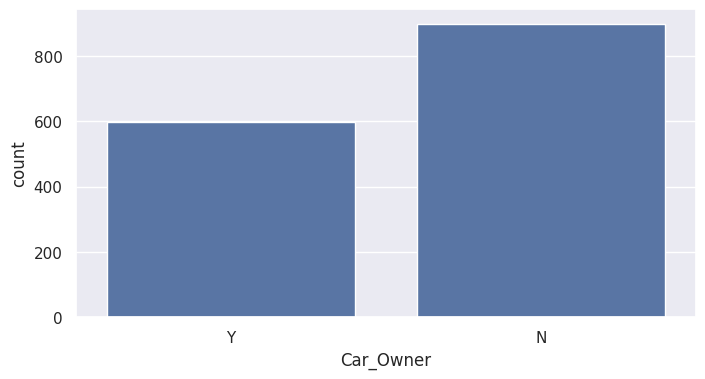

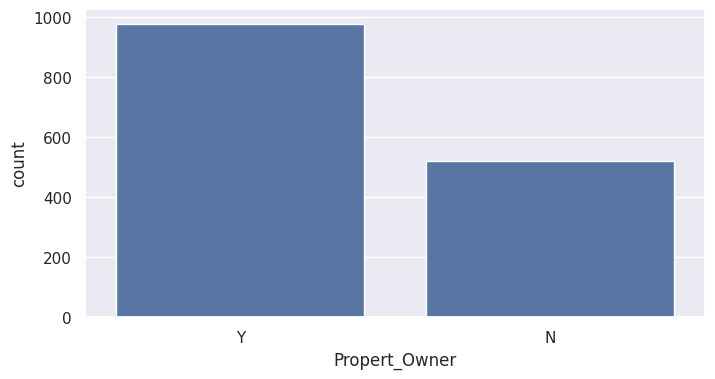

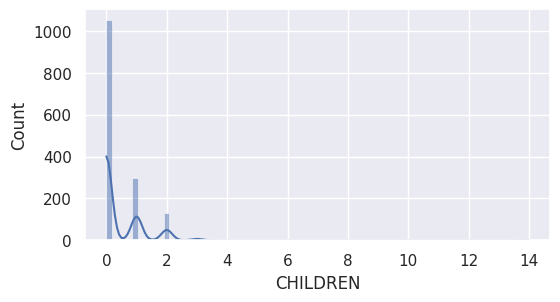

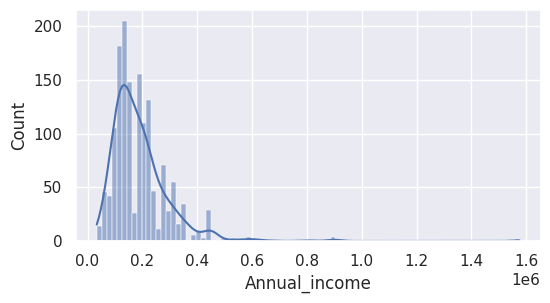

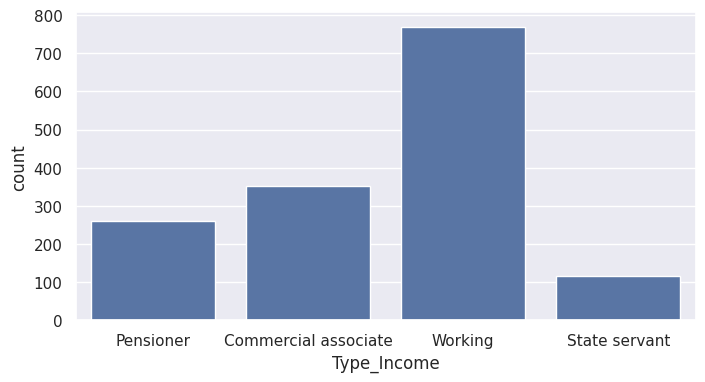

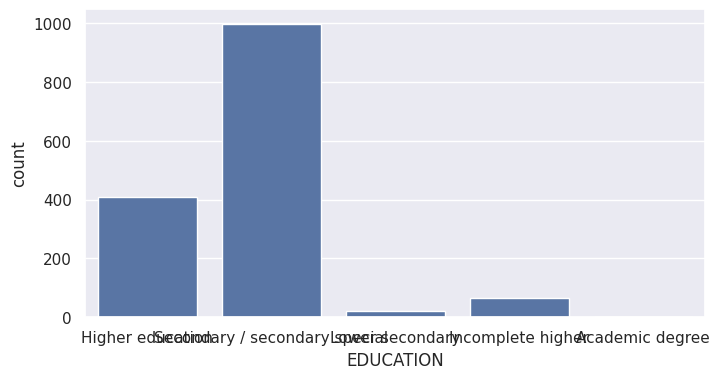

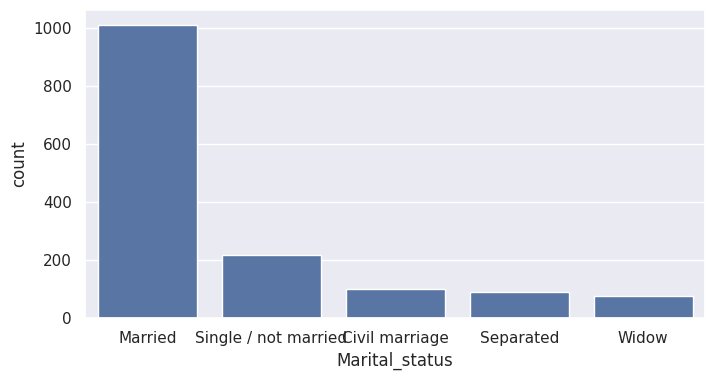

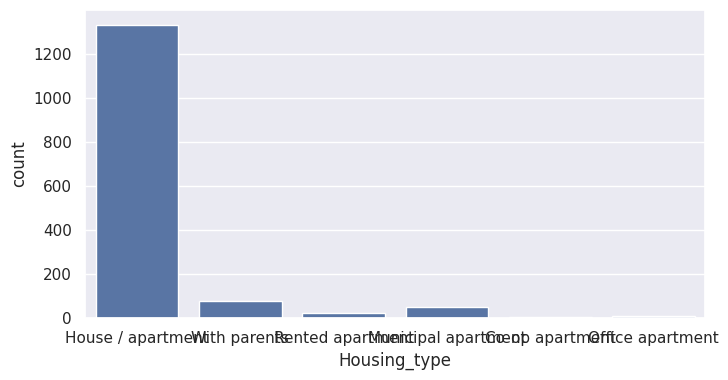

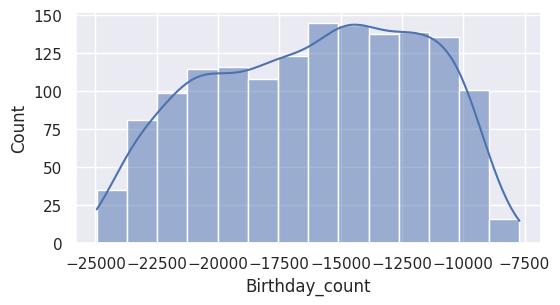

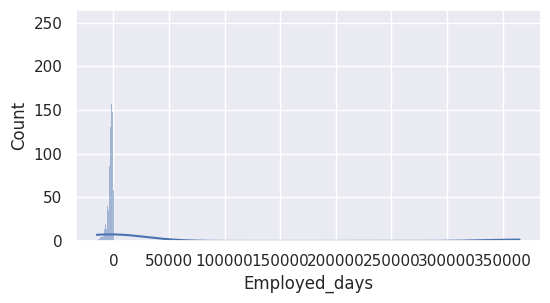

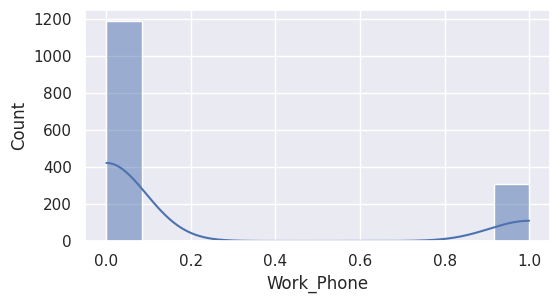

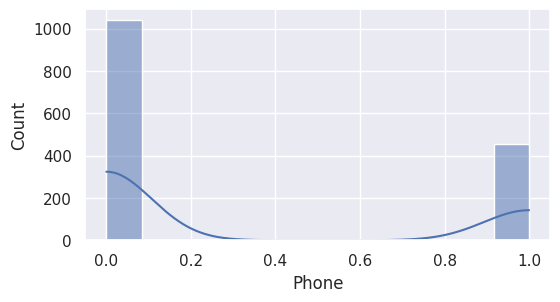

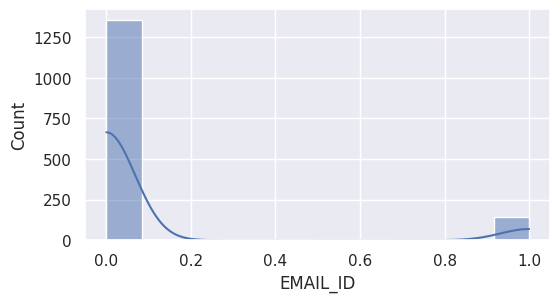

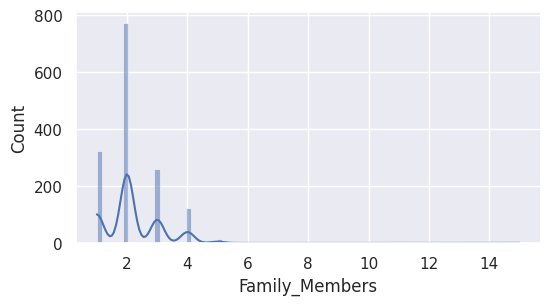

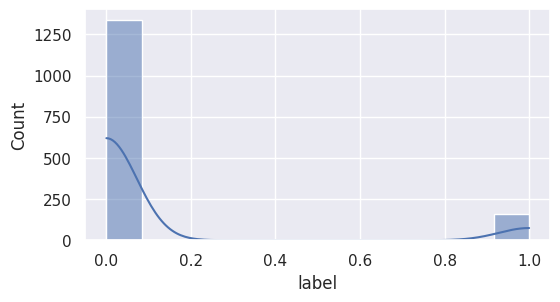

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Loop through all columns in the DataFrame
plt.subplot()
for column in df.columns:
  if df[column].dtype == 'object':
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=column)
    plt.show()
  else:
    plt.figure(figsize=(6,3))
    sns.histplot(data=df, x=column, kde=True, fill=True)
    plt.show()

## 2.2 Bivariate Analysis

## Numericals vs label columns

In [ ]:
numerical_cols = df.select_dtypes(include=["int", "float"]).columns.tolist()
numerical_cols

['Ind_ID',
 'CHILDREN',
 'Annual_income',
 'Birthday_count',
 'Employed_days',
 'Work_Phone',
 'Phone',
 'EMAIL_ID',
 'Family_Members',
 'label']

## Annual Income vs label

<Axes: xlabel='label', ylabel='Annual_income'>

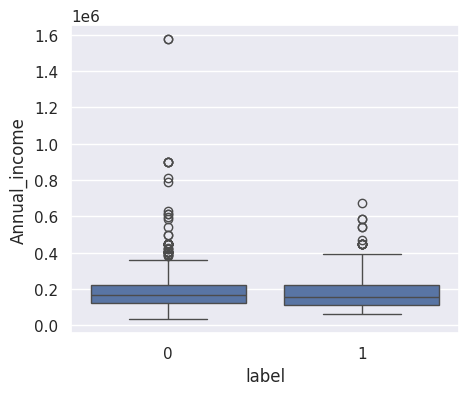

In [ ]:
plt.figure(figsize=(5, 4))
sns.boxplot(x='label', y='Annual_income', data=df)

We can see some difference and will do hypothesis ttest

Null Hypothesis ( H0 ): There is no significant difference in credit card approval between individuals based on annual incomes.

Alternative Hypothesis ( H 1 ): There is a significant difference in credit card approval rates based on annual income.

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Split the data into two groups based on 'Label' (0 for approved, 1 for rejected)
approved_group = df[df['label'] == 0]['Annual_income']
rejected_group = df[df['label'] == 1]['Annual_income']

# Perform the t-test
t_statistic, p_value = ttest_ind(approved_group.dropna(), rejected_group.dropna(), equal_var=False)

# Output the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

T-Statistic: -0.45813232260005543
P-Value: 0.6473631498097685
Fail to reject the null hypothesis


### Converting Birthday_count and Employed_days into years

In [ ]:
df['AGE_YEARS']=round(-df['Birthday_count']/365.2425,0)
df = df.drop(labels='Birthday_count', axis =1)

In [ ]:
df['YEARS_EMPLOYED']=round(-df['Employed_days']/365.2425)
df.loc[df['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0

In [ ]:
df = df.drop(labels='Employed_days', axis =1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 0 to 1547
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ind_ID          1496 non-null   int64  
 1   GENDER          1496 non-null   object 
 2   Car_Owner       1496 non-null   object 
 3   Propert_Owner   1496 non-null   object 
 4   CHILDREN        1496 non-null   int64  
 5   Annual_income   1496 non-null   float64
 6   Type_Income     1496 non-null   object 
 7   EDUCATION       1496 non-null   object 
 8   Marital_status  1496 non-null   object 
 9   Housing_type    1496 non-null   object 
 10  Work_Phone      1496 non-null   int64  
 11  Phone           1496 non-null   int64  
 12  EMAIL_ID        1496 non-null   int64  
 13  Family_Members  1496 non-null   int64  
 14  label           1496 non-null   int64  
 15  AGE_YEARS       1496 non-null   float64
 16  YEARS_EMPLOYED  1496 non-null   float64
dtypes: float64(3), int64(7), object(7

## Years Employed Vs label

<Axes: xlabel='label', ylabel='YEARS_EMPLOYED'>

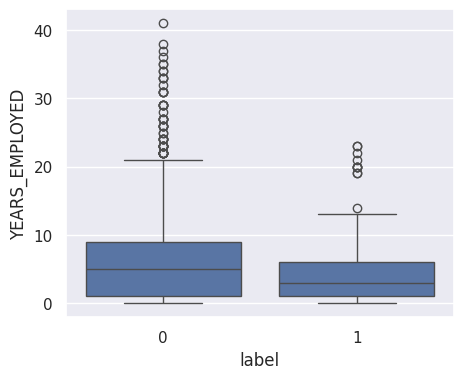

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
sns.boxplot(x='label', y='YEARS_EMPLOYED', data=df)

In [ ]:
mean_years_employed = df.groupby('label')['YEARS_EMPLOYED'].mean()
print(mean_years_employed)

label
0    6.314371
1    4.468750
Name: YEARS_EMPLOYED, dtype: float64


**Interpretation:**
Most of applicant have been working for 4 to 6 years on average
The employment length is positively skewed. People with rejected application are 4 years of employment vs 6 years for approved

## Age vs Label

<Axes: xlabel='label', ylabel='AGE_YEARS'>

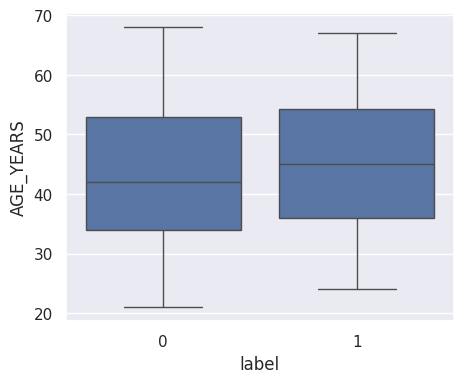

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
sns.boxplot(x='label', y='AGE_YEARS', data=df)

**AGE_YEARS:**
Age feature is kind of normally distributed as we seen in univariate analysis There is difference between the average age of approved and rejected applicants.

## Categorical vs Label

## Education vs label

<Axes: xlabel='count', ylabel='EDUCATION'>

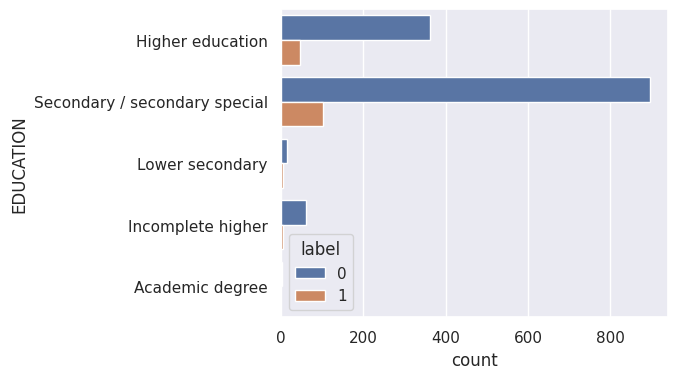

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(y='EDUCATION', hue='label', data=df, orient='h')

## Type_Income vs label

<Axes: xlabel='label', ylabel='count'>

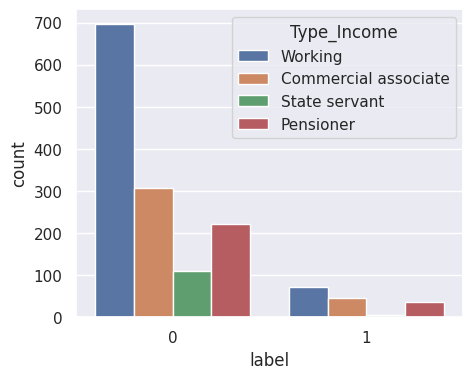

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(x='label', hue='Type_Income', data=df, orient='h')

<Axes: xlabel='label', ylabel='count'>

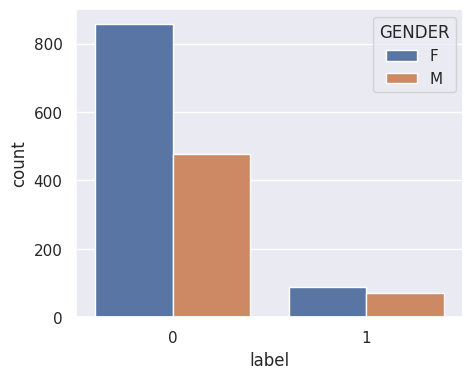

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(x='label', hue='GENDER', data=df)

**Interpretation:**
We have most applicants as Female

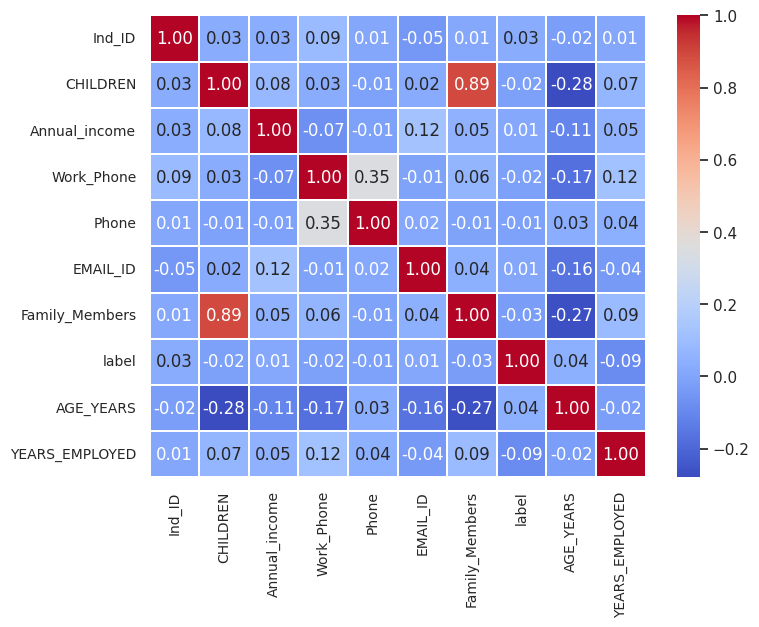

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.3)
plt.tick_params(axis='both', labelsize=10)
plt.show()

**Interpretation:**
There is no feature that is correlated with the target feature

*   Family member count is highly correlated with children count as previously discussed
*   Age has some -ve correlation with the family member count and children count.
*   Another positive correlation is having a phone and having a work phone.
*   The final positive correlation is between the age and work phone.
*   We also have a negative correlation between the years employed and the age as previously seen.


Before data go for futher process, I have to export this cleaned data to be used in SQL project.

In [ ]:
df.to_csv('credit_ard_data.csv', index=False)

Creating new dataframe to be used in SQL

In [ ]:
df_cleaned = df.copy()

In [ ]:
df.drop(labels=['Ind_ID'], axis=1, inplace=True)

# **📌3. Data Preprocessing**

### Described how preprocessing will be done on following features

**ID:**
Already droped the feature

**Gender:**
One hot encoding

**AGE_YEARS:**
Standard Scaler

**Marital status:**
One hot encoding

**Family member count**
Fix outliers

**Children count**
Fix outliers

**Annual_income:**
Remove outliers
scaling

**Type_Occupation:**
Dropped

**Education:**
Ordinal encoding

**EMPLOYED_YEARS:**
Remove outliers
scaling

**car_Owner:**
Change it numerical
One-hot encoding

**propert owner:**
Change it numerical
One-hot encoding

**mobile_phone:**
dropped

**label(Target):**
balance the data with SMOTE

## **3.1 Outlier Treatment**

We have outliers in **Years Employed, Annual_income, Children** and **Family Members**

### Annual Income

<Axes: ylabel='Annual_income'>

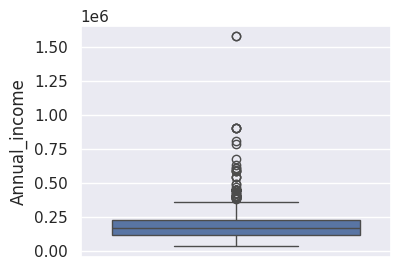

In [ ]:
plt.figure(figsize=(4, 3))
sns.set_theme()
sns.boxplot(df['Annual_income'])

Removing outliers of Annual Income

In [ ]:
import numpy as np
Q1 = df['Annual_income'].quantile(0.25)
Q3 = df['Annual_income'].quantile(0.75)
IQR = Q3 - Q1
LC = Q1 - 1.5 * IQR
UC = Q3 + 1.5 * IQR
df["Annual_income"] = np.where(df["Annual_income"]>UC,UC,df["Annual_income"])

### Years Employed

<Axes: ylabel='YEARS_EMPLOYED'>

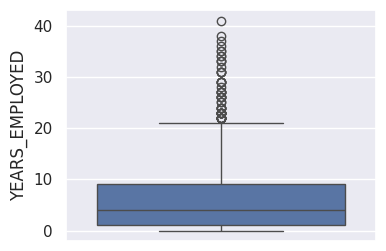

In [ ]:
plt.figure(figsize=(4, 3))
sns.set_theme()
sns.boxplot(df['YEARS_EMPLOYED'])

In [ ]:
# Remove outliers of Years_employed
import numpy as np
Q1 = df['YEARS_EMPLOYED'].quantile(0.25)
Q3 = df['YEARS_EMPLOYED'].quantile(0.75)
IQR = Q3 - Q1
LC = Q1 - 1.5 * IQR
UC = Q3 + 1.5 * IQR
df["YEARS_EMPLOYED"] = np.where(df["YEARS_EMPLOYED"]>UC,UC,df["YEARS_EMPLOYED"])

### Family Members

<Axes: ylabel='Family_Members'>

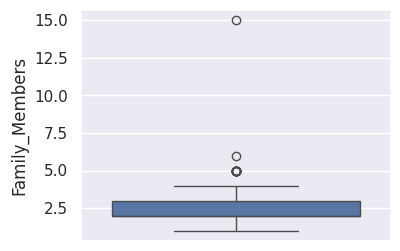

In [ ]:
plt.figure(figsize=(4, 3))
sns.set_theme()
sns.boxplot(df['Family_Members'])

In [ ]:
Q1 = df['Family_Members'].quantile(0.25)
Q3 = df['Family_Members'].quantile(0.75)
IQR = Q3 - Q1
LC = Q1 - 1.5 * IQR
UC = Q3 + 1.5 * IQR
df["Family_Members"] = np.where(df["Family_Members"]>UC,UC,df["Family_Members"])

### Children

<Axes: ylabel='CHILDREN'>

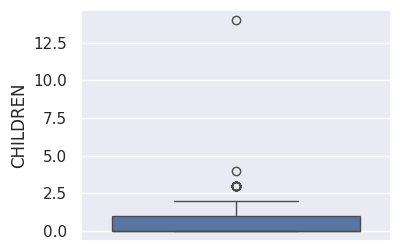

In [ ]:
plt.figure(figsize=(4, 3))
sns.set_theme()
sns.boxplot(df['CHILDREN'])

In [ ]:
Q1 = df['CHILDREN'].quantile(0.25)
Q3 = df['CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
LC = Q1 - 1.5 * IQR
UC = Q3 + 1.5 * IQR
df["CHILDREN"] = np.where(df["CHILDREN"]>UC,UC,df["CHILDREN"])

## **3.2 Categorical Encoding**

In [ ]:
df.select_dtypes(object).columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type'],
      dtype='object')

In [ ]:
encode_cols = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'Marital_status', 'Housing_type']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=encode_cols, drop_first=True)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 0 to 1547
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CHILDREN                             1496 non-null   float64
 1   Annual_income                        1496 non-null   float64
 2   EDUCATION                            1496 non-null   object 
 3   Work_Phone                           1496 non-null   int64  
 4   Phone                                1496 non-null   int64  
 5   EMAIL_ID                             1496 non-null   int64  
 6   Family_Members                       1496 non-null   float64
 7   label                                1496 non-null   int64  
 8   AGE_YEARS                            1496 non-null   float64
 9   YEARS_EMPLOYED                       1496 non-null   float64
 10  GENDER_M                             1496 non-null   uint8  
 11  Car_Owner_Y                   

In [ ]:
# Specify the column to be encoded
column_to_encode = ['EDUCATION']

# Create an instance of OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Lower secondary', 'Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Academic degree']])

# Fit and transform the specified column
df_encoded[column_to_encode] = encoder.fit_transform(df_encoded[column_to_encode])

# Display the result
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 0 to 1547
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CHILDREN                             1496 non-null   float64
 1   Annual_income                        1496 non-null   float64
 2   EDUCATION                            1496 non-null   float64
 3   Work_Phone                           1496 non-null   int64  
 4   Phone                                1496 non-null   int64  
 5   EMAIL_ID                             1496 non-null   int64  
 6   Family_Members                       1496 non-null   float64
 7   label                                1496 non-null   int64  
 8   AGE_YEARS                            1496 non-null   float64
 9   YEARS_EMPLOYED                       1496 non-null   float64
 10  GENDER_M                             1496 non-null   uint8  
 11  Car_Owner_Y                   

## **3.3 Feature Splitting**

In [ ]:
X = df_encoded.drop('label',axis=1)
y = df_encoded['label']

### **Solving class imbalance in traget variable**

A generalised version of Smote ADASYN

In [ ]:
smote = ADASYN()
X, y = smote.fit_resample(X, y)

In [ ]:
print("Composition of the target classes:", Counter(y))

Composition of the target classes: Counter({0: 1336, 1: 1292})


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2623    1
2624    1
2625    1
2626    1
2627    1
Name: label, Length: 2628, dtype: int64

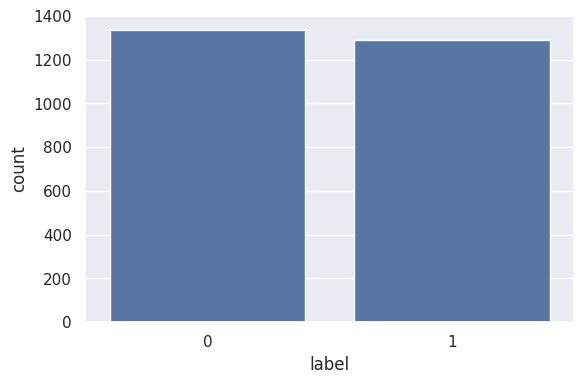

In [ ]:
plt.figure(figsize=(6,4))
fig = sns.countplot(x=y)
plt.tight_layout()
plt.show(fig)

## **3.4 Performing train-test-split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=64)

## **3.5 Feature Selection**

In [ ]:
rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=15,step=2,verbose=3)
rfe.fit(X_train,y_train)

Fitting estimator with 24 features.
Fitting estimator with 22 features.
Fitting estimator with 20 features.
Fitting estimator with 18 features.
Fitting estimator with 16 features.


RFE(estimator=RandomForestClassifier(), n_features_to_select=15, step=2,
    verbose=3)

In [ ]:
selected_features = rfe.get_feature_names_out()
selected_features

array(['CHILDREN', 'Annual_income', 'EDUCATION', 'Work_Phone', 'Phone',
       'Family_Members', 'AGE_YEARS', 'YEARS_EMPLOYED', 'GENDER_M',
       'Car_Owner_Y', 'Propert_Owner_Y', 'Type_Income_State servant',
       'Type_Income_Working', 'Marital_status_Married',
       'Housing_type_House / apartment'], dtype=object)

In [ ]:
X_train = X_train[selected_features.tolist()]
X_test = X_test[selected_features.tolist()]

## **3.6 Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

# **📌4. Model Training and Evaluation**

Creating list to store all classification metrics of different model used. This list we help to create a dictionary which at last will be represnted as DataFrame

In [ ]:
models = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

Created a function which can be called and entered model will perform the desired actions inside the function

In [ ]:
def train_and_evaluate_model(model):
    model.fit(x_train_scaled,y_train)
    y_pred = model.predict(x_test_scaled)
    print("Classification Report of Model:")
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    PrecisionRecallDisplay.from_predictions(y_test,y_pred)
    RocCurveDisplay.from_predictions(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average='macro')
    recall = recall_score(y_test,y_pred,average='macro')
    f1 = f1_score(y_test,y_pred,average='macro')
    roc_auc = roc_auc_score(y_test,y_pred,average='macro')
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    models.append(model)
    gc.collect()

## 4.1. Logistic Regression

Classification Report of Model:
              precision    recall  f1-score   support

           0       0.71      0.72      0.72       398
           1       0.71      0.70      0.71       391

    accuracy                           0.71       789
   macro avg       0.71      0.71      0.71       789
weighted avg       0.71      0.71      0.71       789



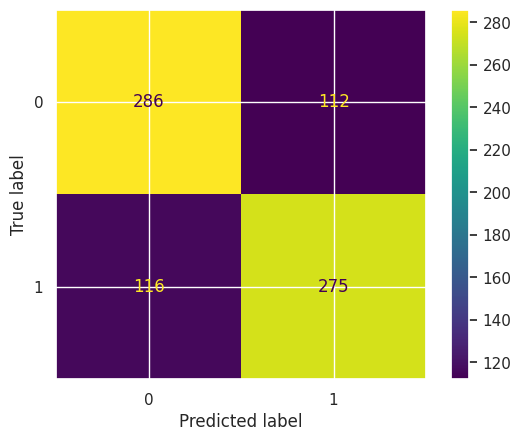

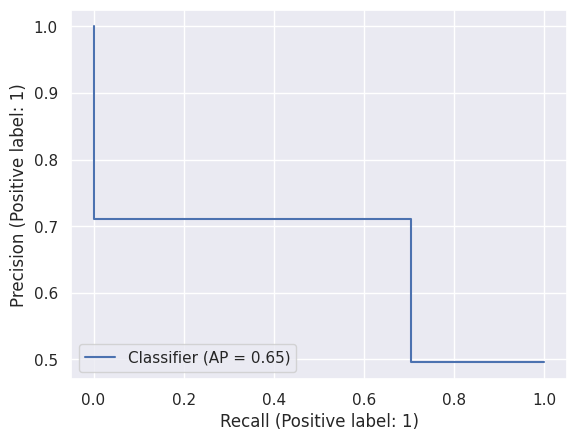

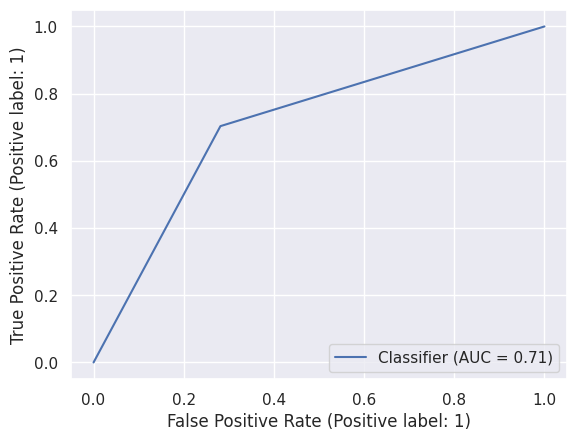

In [ ]:
train_and_evaluate_model(LogisticRegression())

## 4.2. XGBClassifier

Classification Report of Model:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       398
           1       0.94      0.94      0.94       391

    accuracy                           0.94       789
   macro avg       0.94      0.94      0.94       789
weighted avg       0.94      0.94      0.94       789



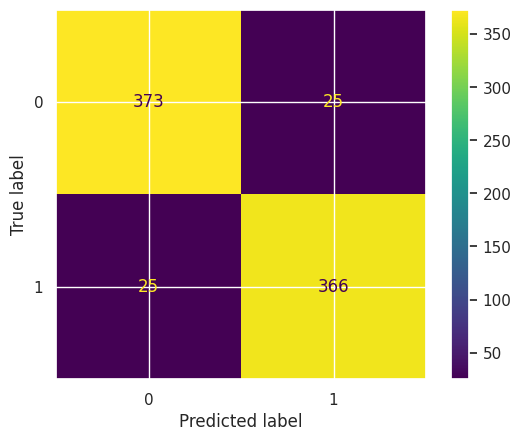

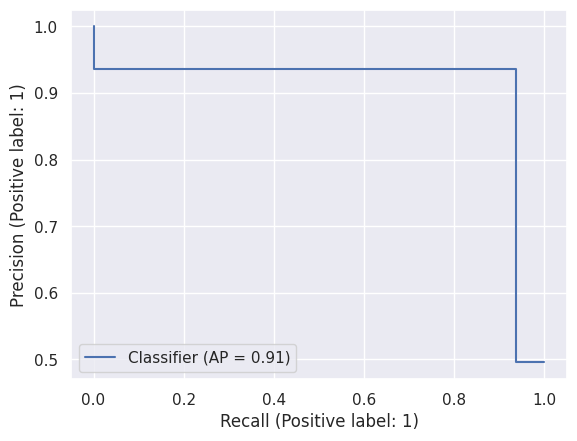

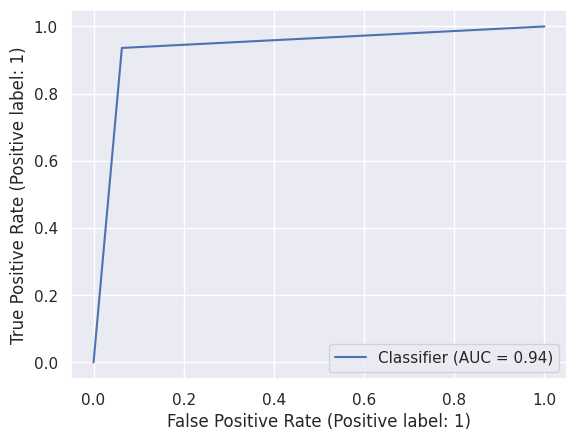

In [ ]:
train_and_evaluate_model(XGBClassifier())

## 4.3. Support Vector Machine

Classification Report of Model:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       398
           1       0.85      0.83      0.84       391

    accuracy                           0.84       789
   macro avg       0.84      0.84      0.84       789
weighted avg       0.84      0.84      0.84       789



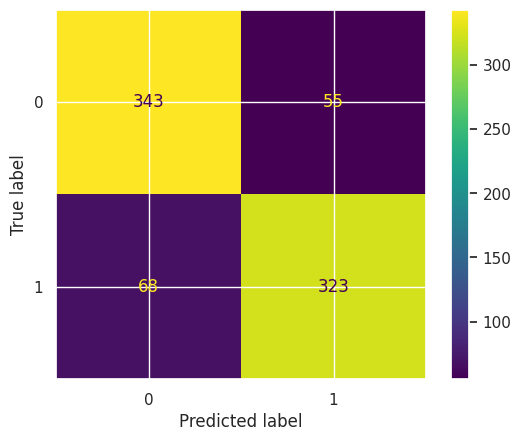

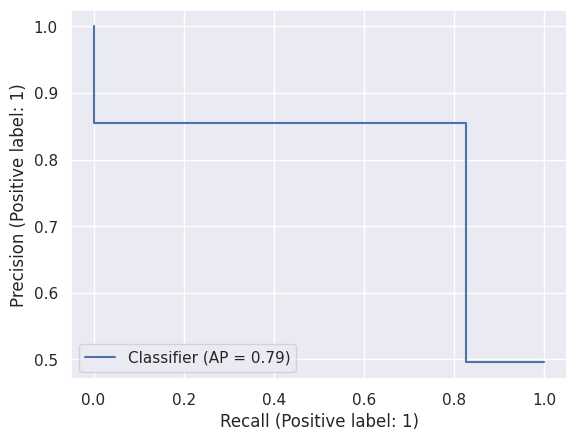

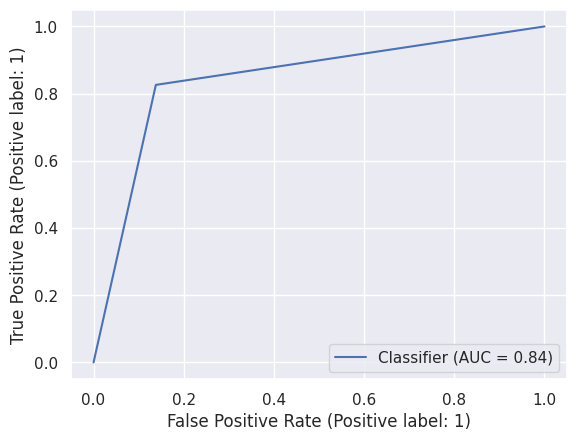

In [ ]:
train_and_evaluate_model(SVC())

## 4.4. RandomForest Classifier

Classification Report of Model:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       398
           1       0.95      0.92      0.94       391

    accuracy                           0.94       789
   macro avg       0.94      0.94      0.94       789
weighted avg       0.94      0.94      0.94       789



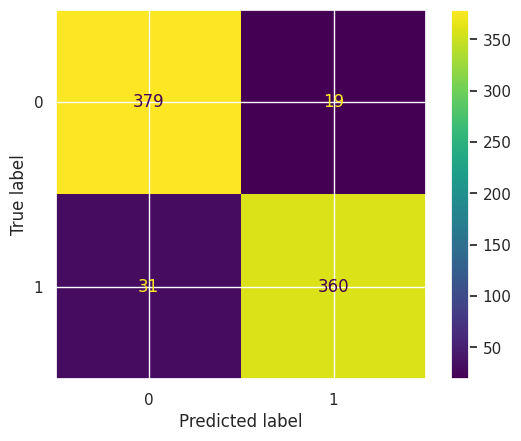

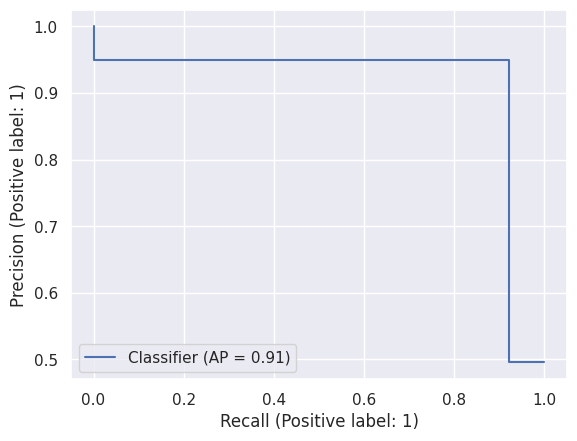

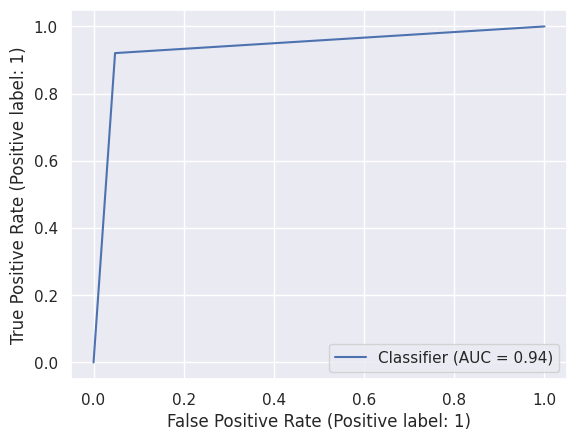

In [ ]:
train_and_evaluate_model(RandomForestClassifier())

# **📌5. Model Selection**

In [ ]:
model_perfs = pd.DataFrame({'Model': models,
                            'Accuracy': accuracy_scores,
                            'Precision': precision_scores,
                            'Recall': recall_scores,
                            'F1': f1_scores}).sort_values('Accuracy',ascending=False).reset_index(drop=True)
model_perfs

,Model,Accuracy,Precision,Recall,F1
0,"XGBClassifier(base_score=None, booster=None, c...",0.936629,0.936624,0.936624,0.936624
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.936629,0.937129,0.936489,0.936592
2,SVC(),0.844106,0.844524,0.843948,0.844006
3,LogisticRegression(),0.711027,0.711019,0.710959,0.710970


In [ ]:
best_model = model_perfs.iloc[0]['Model']
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## The best ML model is XGBClassifier

In [ ]:
avg_cv_scores = cross_val_score(best_model,x_test_scaled,y_test,scoring='accuracy',cv=5,verbose=2)
mean_score = round(np.mean(avg_cv_scores),4)
print(f"Mean Cross Validation Performance: {mean_score*100}%")

[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.2s
Mean Cross Validation Performance: 90.11%


## **5.1 Hyperparameter Tuning**

###5.1.1. Support Vector Machine

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=0.001, degree=2, gamma=scale, kernel=linear, shrinking=True;, score=0.707 total time=   0.3s
[CV 2/5] END C=0.001, degree=2, gamma=scale, kernel=linear, shrinking=True;, score=0.674 total time=   0.2s
[CV 3/5] END C=0.001, degree=2, gamma=scale, kernel=linear, shrinking=True;, score=0.753 total time=   0.2s
[CV 4/5] END C=0.001, degree=2, gamma=scale, kernel=linear, shrinking=True;, score=0.723 total time=   0.2s
[CV 5/5] END C=0.001, degree=2, gamma=scale, kernel=linear, shrinking=True;, score=0.757 total time=   0.2s
[CV 1/5] END C=0.01, degree=4, gamma=scale, kernel=sigmoid, shrinking=False;, score=0.690 total time=   0.4s
[CV 2/5] END C=0.01, degree=4, gamma=scale, kernel=sigmoid, shrinking=False;, score=0.655 total time=   0.5s
[CV 3/5] END C=0.01, degree=4, gamma=scale, kernel=sigmoid, shrinking=False;, score=0.745 total time=   0.4s
[CV 4/5] END C=0.01, degree=4, gamma=scale, kernel=sigmoid, shrinking=Fa

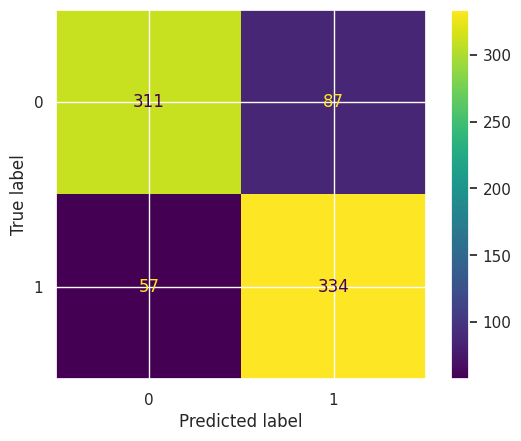

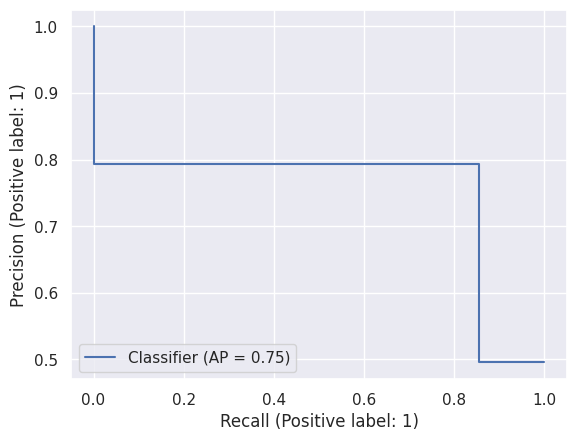

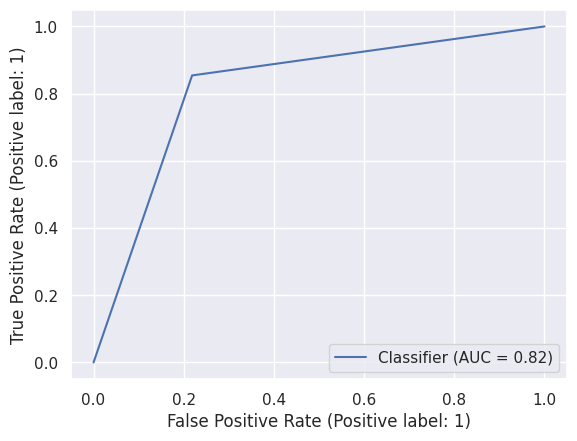

In [ ]:
param_grid = {'C': [0.001,0.01,0.1,1,5],
             'gamma': ['scale','auto'],
             'kernel': ['linear','poly','rbf','sigmoid'],
             'degree': [2,3,4,5],
             'shrinking': [True,False]
             }

grid_svm = RandomizedSearchCV(SVC(),param_grid,verbose=3,cv=5)
train_and_evaluate_model(grid_svm)

After tuning, there is increase in accuracy to .84

### 5.1.2. Logistic Regression

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=0.1, l1_ratio=0.2, multi_class=ovr, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=0.1, l1_ratio=0.2, multi_class=ovr, penalty=l1, solver=saga;, score=0.663 total time=   0.0s
[CV 3/5] END C=0.1, l1_ratio=0.2, multi_class=ovr, penalty=l1, solver=saga;, score=0.739 total time=   0.0s
[CV 4/5] END C=0.1, l1_ratio=0.2, multi_class=ovr, penalty=l1, solver=saga;, score=0.728 total time=   0.0s
[CV 5/5] END C=0.1, l1_ratio=0.2, multi_class=ovr, penalty=l1, solver=saga;, score=0.728 total time=   0.0s
[CV 1/5] END C=0.1, l1_ratio=0.8, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.690 total time=   0.0s
[CV 2/5] END C=0.1, l1_ratio=0.8, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.666 total time=   0.0s
[CV 3/5] END C=0.1, l1_ratio=0.8, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.739 total time=   0.0s
[CV 4/5] END C=0.1, l1_ratio=0.8, multi_class=ovr, penalty=l

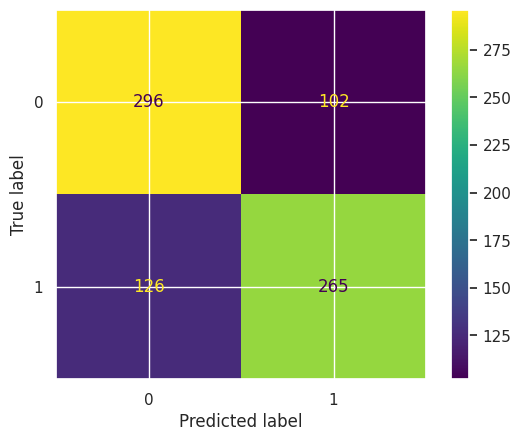

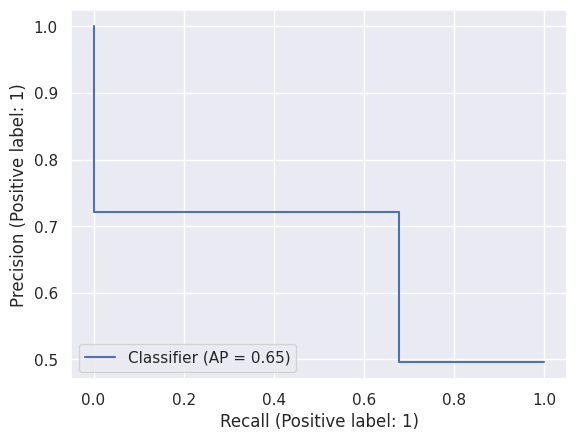

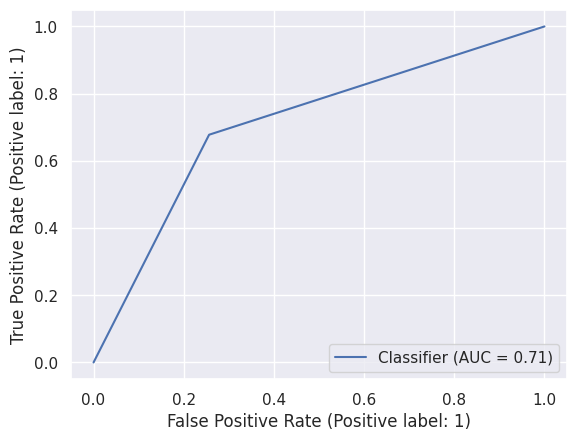

In [ ]:
# Tuning for Logistic Regression
param_grid = {'penalty': ['l1','l2','elasticnet'],
              'C': [0.001,0.01,0.1,0.5],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'multi_class': ['ovr', 'multinomial'],
              'l1_ratio': [0.2,0.5,0.8]
             }

grid_lr = RandomizedSearchCV(LogisticRegression(),param_grid,verbose=3,cv=5)
train_and_evaluate_model(grid_lr)

# **📌6. Top model**
we can that conclude that our top model is: XGBClassifier



# **📌SQL Section**

In [ ]:
import duckdb

In [ ]:
conn=duckdb.connect()

In [ ]:
conn.register('df_cleaned', df_cleaned)

In [ ]:
conn.execute("select * from df_cleaned limit 5").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Work_Phone,Phone,EMAIL_ID,Family_Members,label,AGE_YEARS,YEARS_EMPLOYED
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,0,0,0,2,1,51.0,0.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,1,37.0,2.0
2,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,1,37.0,2.0
3,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,1,37.0,2.0
4,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0,0,0,2,1,61.0,0.0


### 1. Group the customer based on their income type and find the average of their annual income

In [ ]:
conn.execute("select Type_Income as Income_Type, avg(Annual_income) as Avg_Income from df_cleaned group by Type_income").fetchdf()

,Income_Type,Avg_Income
0,Pensioner,154964.866795
1,Working,180154.579974
2,State servant,210130.434783
3,Commercial associate,233880.169972


### 2. Find the female owners of car and property

In [ ]:
conn.execute("select count(Ind_ID) as Total_Females from df_cleaned WHERE GENDER ='F' and Car_Owner ='Y' and Propert_Owner ='Y'").fetchdf()

,Total_Females
0,172


### 3. Find the male customers who are staying with the families

In [ ]:
conn.execute("select count(Ind_ID) as Total_Males from df_cleaned WHERE GENDER ='M' and Housing_type='With parents'").fetchdf()

,Total_Males
0,37


### 4. Please list the top five people having the highest income

In [ ]:
conn.execute("select Ind_ID as Application_IDs, Annual_income from df_cleaned order by Annual_income desc limit 5").fetchdf()

,Application_IDs,Annual_income
0,5143231,1575000.0
1,5143235,1575000.0
2,5090470,900000.0
3,5079016,900000.0
4,5079017,900000.0


### 5. How many married people are having bad credit?

In [ ]:
conn.execute("select count(Ind_ID) as bad_credit_count from df_cleaned where Marital_status='Married' and label=1").fetchdf()

,bad_credit_count
0,104


### 6. What is highest education level and what is the total_count

The highest level of education is Academic degree

In [ ]:
conn.execute("select count(Ind_ID) as Highest_degree_count from df_cleaned where EDUCATION='Academic degree'").fetchdf()

,Highest_degree_count
0,2


In [ ]:
df['EDUCATION'].value_counts()


Secondary / secondary special    998
Higher education                 409
Incomplete higher                 66
Lower secondary                   21
Academic degree                    2
Name: EDUCATION, dtype: int64

### 7. Between married males and females, who is having more bad credits?

In [ ]:
conn.execute("select GENDER, count(GENDER) as Count from df_cleaned where Marital_status='Married' and label=1 group by GENDER order by Count desc limit 1").fetchdf()

,GENDER,Count
0,F,54
